In [1]:
import torch
from torch.utils.model_zoo import load_url
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
%config InlineBackend.figure_format='retina'
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib as mpl

import sys
from tqdm import tqdm

import pandas as pd
import numpy as np

In [32]:
ds='dfdc'
ds_='dfdc-35-5-10'#'celebdf-35-5-10'#'ffpp-c23-720-140-140'#'dfdc-35-5-10'

with open("runs/"+ds+"/test_truth_preds.txt") as f:
    content = f.readlines()
all_truth = [float(i) for i in content[0][1:-2].split(',')]
all_preds = [float(i) for i in content[1][1:-2].split(',')]
all_preds = np.array([pred if pred!=-1 else all_preds[i-1] for i, pred in enumerate(all_preds)])
all_preds = 1-all_preds
print(len(all_truth))

2592


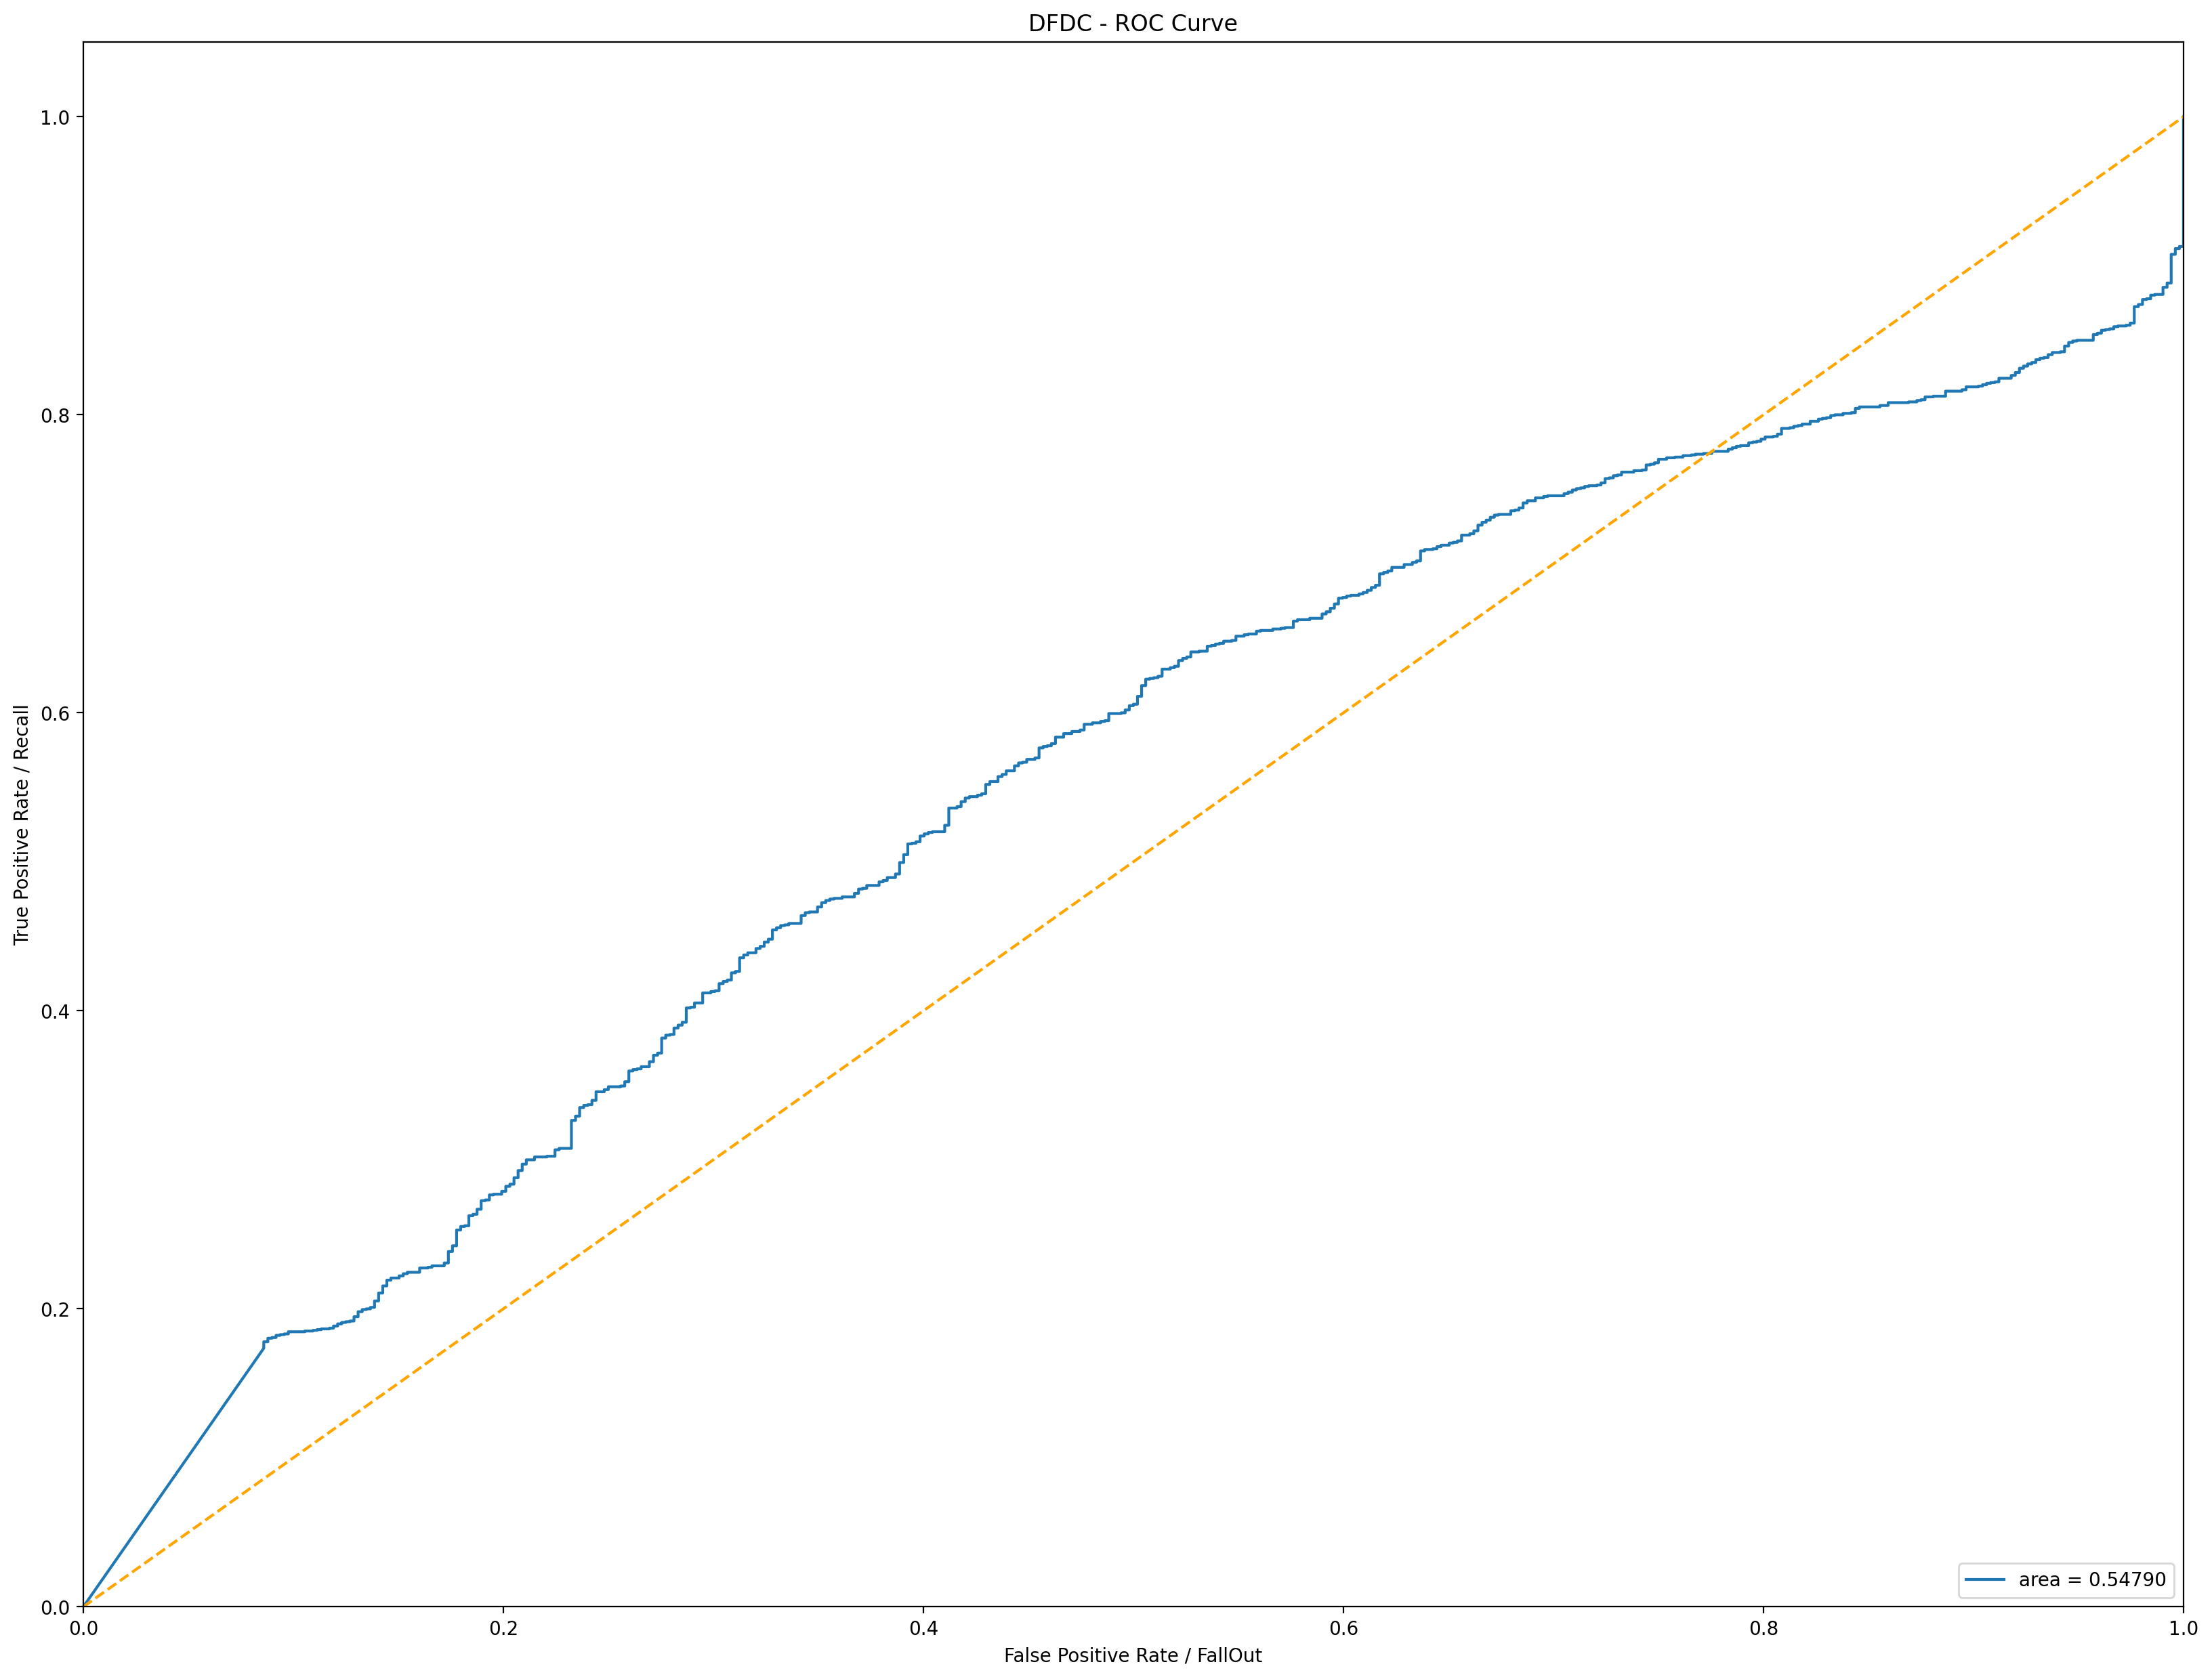

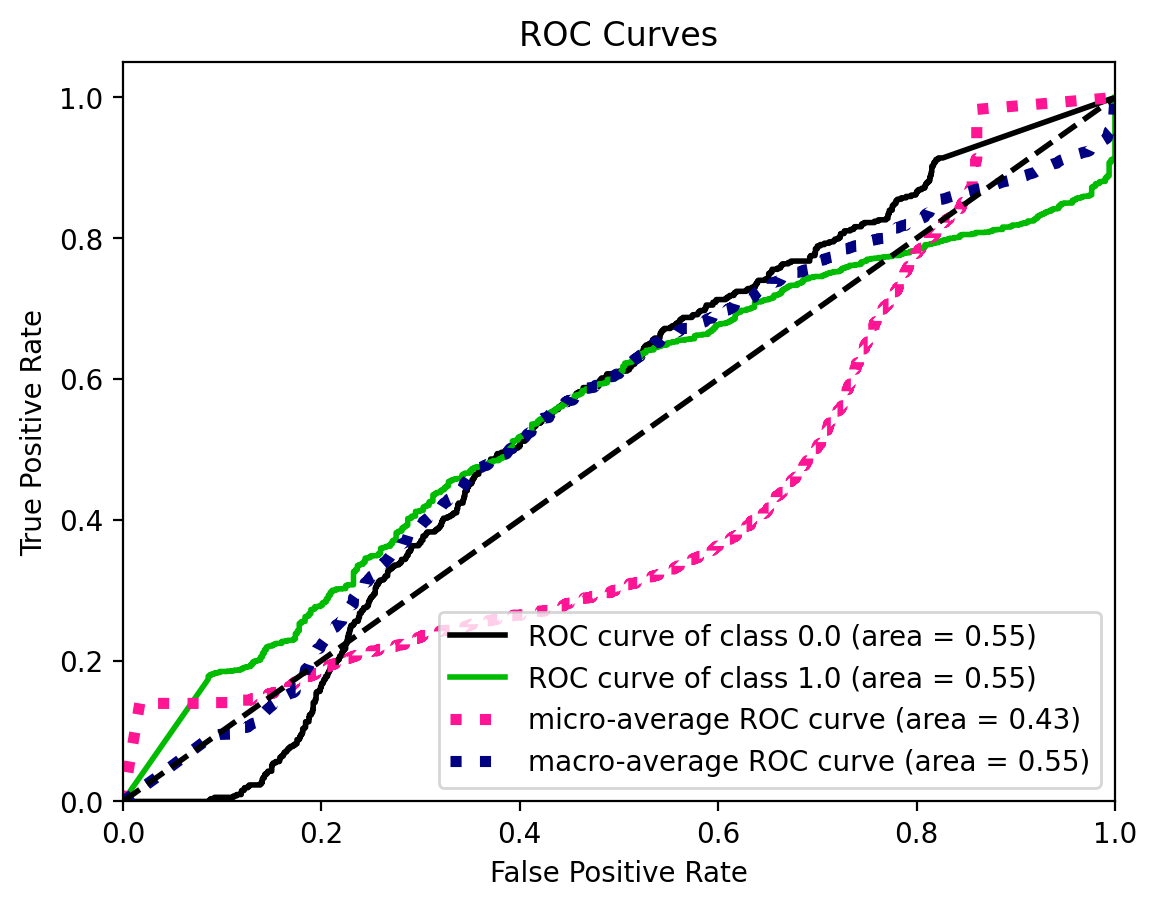

In [34]:
mpl.rcParams.update(mpl.rcParamsDefault)

fpr, tpr, _ = roc_curve(all_truth, all_preds)
roc_auc = auc(fpr, tpr)
    
plt.figure(figsize=(20, 15))

plt.plot(fpr, tpr, label='area = %0.5f' % roc_auc)

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / FallOut')
plt.ylabel('True Positive Rate / Recall')
plt.title(ds.upper()+' - ROC Curve')
plt.legend(loc="lower right")
plt.show()

import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = all_truth
y_probas = np.array([1-np.array(all_preds), np.array(all_preds)]).T
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

In [4]:
df = pd.read_pickle("../icpr2020dfdc/output/"+ds+"/dfs/from_video_0_to_video_0.pkl")
test_folder = torch.load("../icpr2020dfdc/weights/binclass/net-EfficientNetB4_traindb-"+ds_+"_face-scale_size-224_seed-41_2/bestval.pth")['test_videos_used'][0]
test_df = df[df.video.isin(test_folder)]
test_df['truth'] = all_truth
test_df['preds']= all_preds

<ipython-input-4-438108005df8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['truth'] = all_truth
<ipython-input-4-438108005df8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['preds']= all_preds


In [5]:
pd.set_option('display.max_rows', df.shape[0]+1)
test_df

,video,label,videosubject,class,source,quality,original,kp1x,kp1y,kp2x,...,kp6x,kp6y,conf,left,top,right,bottom,nfaces,truth,preds
facepath,,,,,,,,,,,,,,,,,,,,,
acifjvzvpm.mp4/fr000_subj0.jpg,acifjvzvpm.mp4,True,0,manipulated_sequences,videos,?,kbvibjhfzo.mp4,228,220,271,...,306,228,0.995570,181,149,330,319,1,1.0,0.999968
acifjvzvpm.mp4/fr009_subj0.jpg,acifjvzvpm.mp4,True,0,manipulated_sequences,videos,?,kbvibjhfzo.mp4,231,218,272,...,303,232,0.997065,184,150,329,316,1,1.0,0.999992
acifjvzvpm.mp4/fr019_subj0.jpg,acifjvzvpm.mp4,True,0,manipulated_sequences,videos,?,kbvibjhfzo.mp4,229,216,272,...,305,226,0.949493,181,145,330,315,1,1.0,0.998330
acifjvzvpm.mp4/fr028_subj0.jpg,acifjvzvpm.mp4,True,0,manipulated_sequences,videos,?,kbvibjhfzo.mp4,227,211,267,...,304,223,0.945526,181,141,330,310,1,1.0,0.999912
acifjvzvpm.mp4/fr038_subj0.jpg,acifjvzvpm.mp4,True,0,manipulated_sequences,videos,?,kbvibjhfzo.mp4,228,210,269,...,304,226,0.929481,182,141,331,310,1,1.0,0.998189
acifjvzvpm.mp4/fr048_subj0.jpg,acifjvzvpm.mp4,True,0,manipulated_sequences,videos,?,kbvibjhfzo.mp4,226,214,266,...,304,226,0.996065,183,144,329,312,1,1.0,0.999979
acifjvzvpm.mp4/fr057_subj0.jpg,acifjvzvpm.mp4,True,0,manipulated_sequences,videos,?,kbvibjhfzo.mp4,229,213,270,...,304,225,0.992031,183,143,330,312,1,1.0,0.999518
acifjvzvpm.mp4/fr067_subj0.jpg,acifjvzvpm.mp4,True,0,manipulated_sequences,videos,?,kbvibjhfzo.mp4,229,213,270,...,304,226,0.994211,183,144,330,311,1,1.0,0.999222
acifjvzvpm.mp4/fr077_subj0.jpg,acifjvzvpm.mp4,True,0,manipulated_sequences,videos,?,kbvibjhfzo.mp4,231,212,273,...,303,229,0.996279,182,145,330,313,1,1.0,0.956643


In [6]:
1.72430128e-01>0.1

True

In [7]:
test_folder

array(['bydaidkpdp.mp4', 'btjlfpzbdu.mp4', 'ayqvfdhslr.mp4',
       'crktehraph.mp4', 'asmpfjfzif.mp4', 'eoewqcpbgt.mp4',
       'dhevettufk.mp4', 'ehdkmxgtxh.mp4', 'cthdnahrkh.mp4',
       'cbbibzcoih.mp4', 'bjsmaqefoi.mp4', 'acifjvzvpm.mp4',
       'esnntzzajv.mp4', 'eajlrktemq.mp4', 'ajwpjhrbcv.mp4',
       'bbhpvrmbse.mp4', 'dboxtiehng.mp4', 'bdbhekrrwo.mp4',
       'deyyistcrd.mp4', 'ejkqesyvam.mp4', 'bmioepcpsx.mp4',
       'bbhtdfuqxq.mp4', 'epymyyiblu.mp4', 'ecwaxgutkc.mp4',
       'elginszwtk.mp4', 'altziddtxi.mp4', 'bkmdzhfzfh.mp4',
       'dntkzzzcdh.mp4', 'boovltmuwi.mp4', 'cqhngvpgyi.mp4',
       'bsqgziaylx.mp4', 'acqfdwsrhi.mp4', 'cbltdtxglo.mp4',
       'btunxncpjh.mp4', 'esxrvsgpvb.mp4', 'bqdjzqhcft.mp4',
       'aelzhcnwgf.mp4', 'bchnbulevv.mp4', 'btmsngnqhv.mp4',
       'dvumqqhoac.mp4', 'chzieimrwu.mp4', 'cxrfacemmq.mp4',
       'byofowlkki.mp4', 'ahfazfbntc.mp4', 'eeyhxisdfh.mp4',
       'djvtbgwdcc.mp4', 'brvqtabyxj.mp4', 'dqswpjoepo.mp4',
       'bzmdrafeex.mp4',

In [29]:
ds='ffpp'
ds_='ffpp-c23-720-140-140'#'dfdc-35-5-10'

with open("runs/"+ds+"/test_truth_preds.txt") as f:
    content = f.readlines()
all_truth = [float(i) for i in content[0][1:-2].split(',')]
all_preds = [float(i) for i in content[1][1:-2].split(',')]
all_preds = np.array([pred if pred!=-1 else all_preds[i-1] for i, pred in enumerate(all_preds)])
all_preds = 1-all_preds
print(len(all_truth))

26879


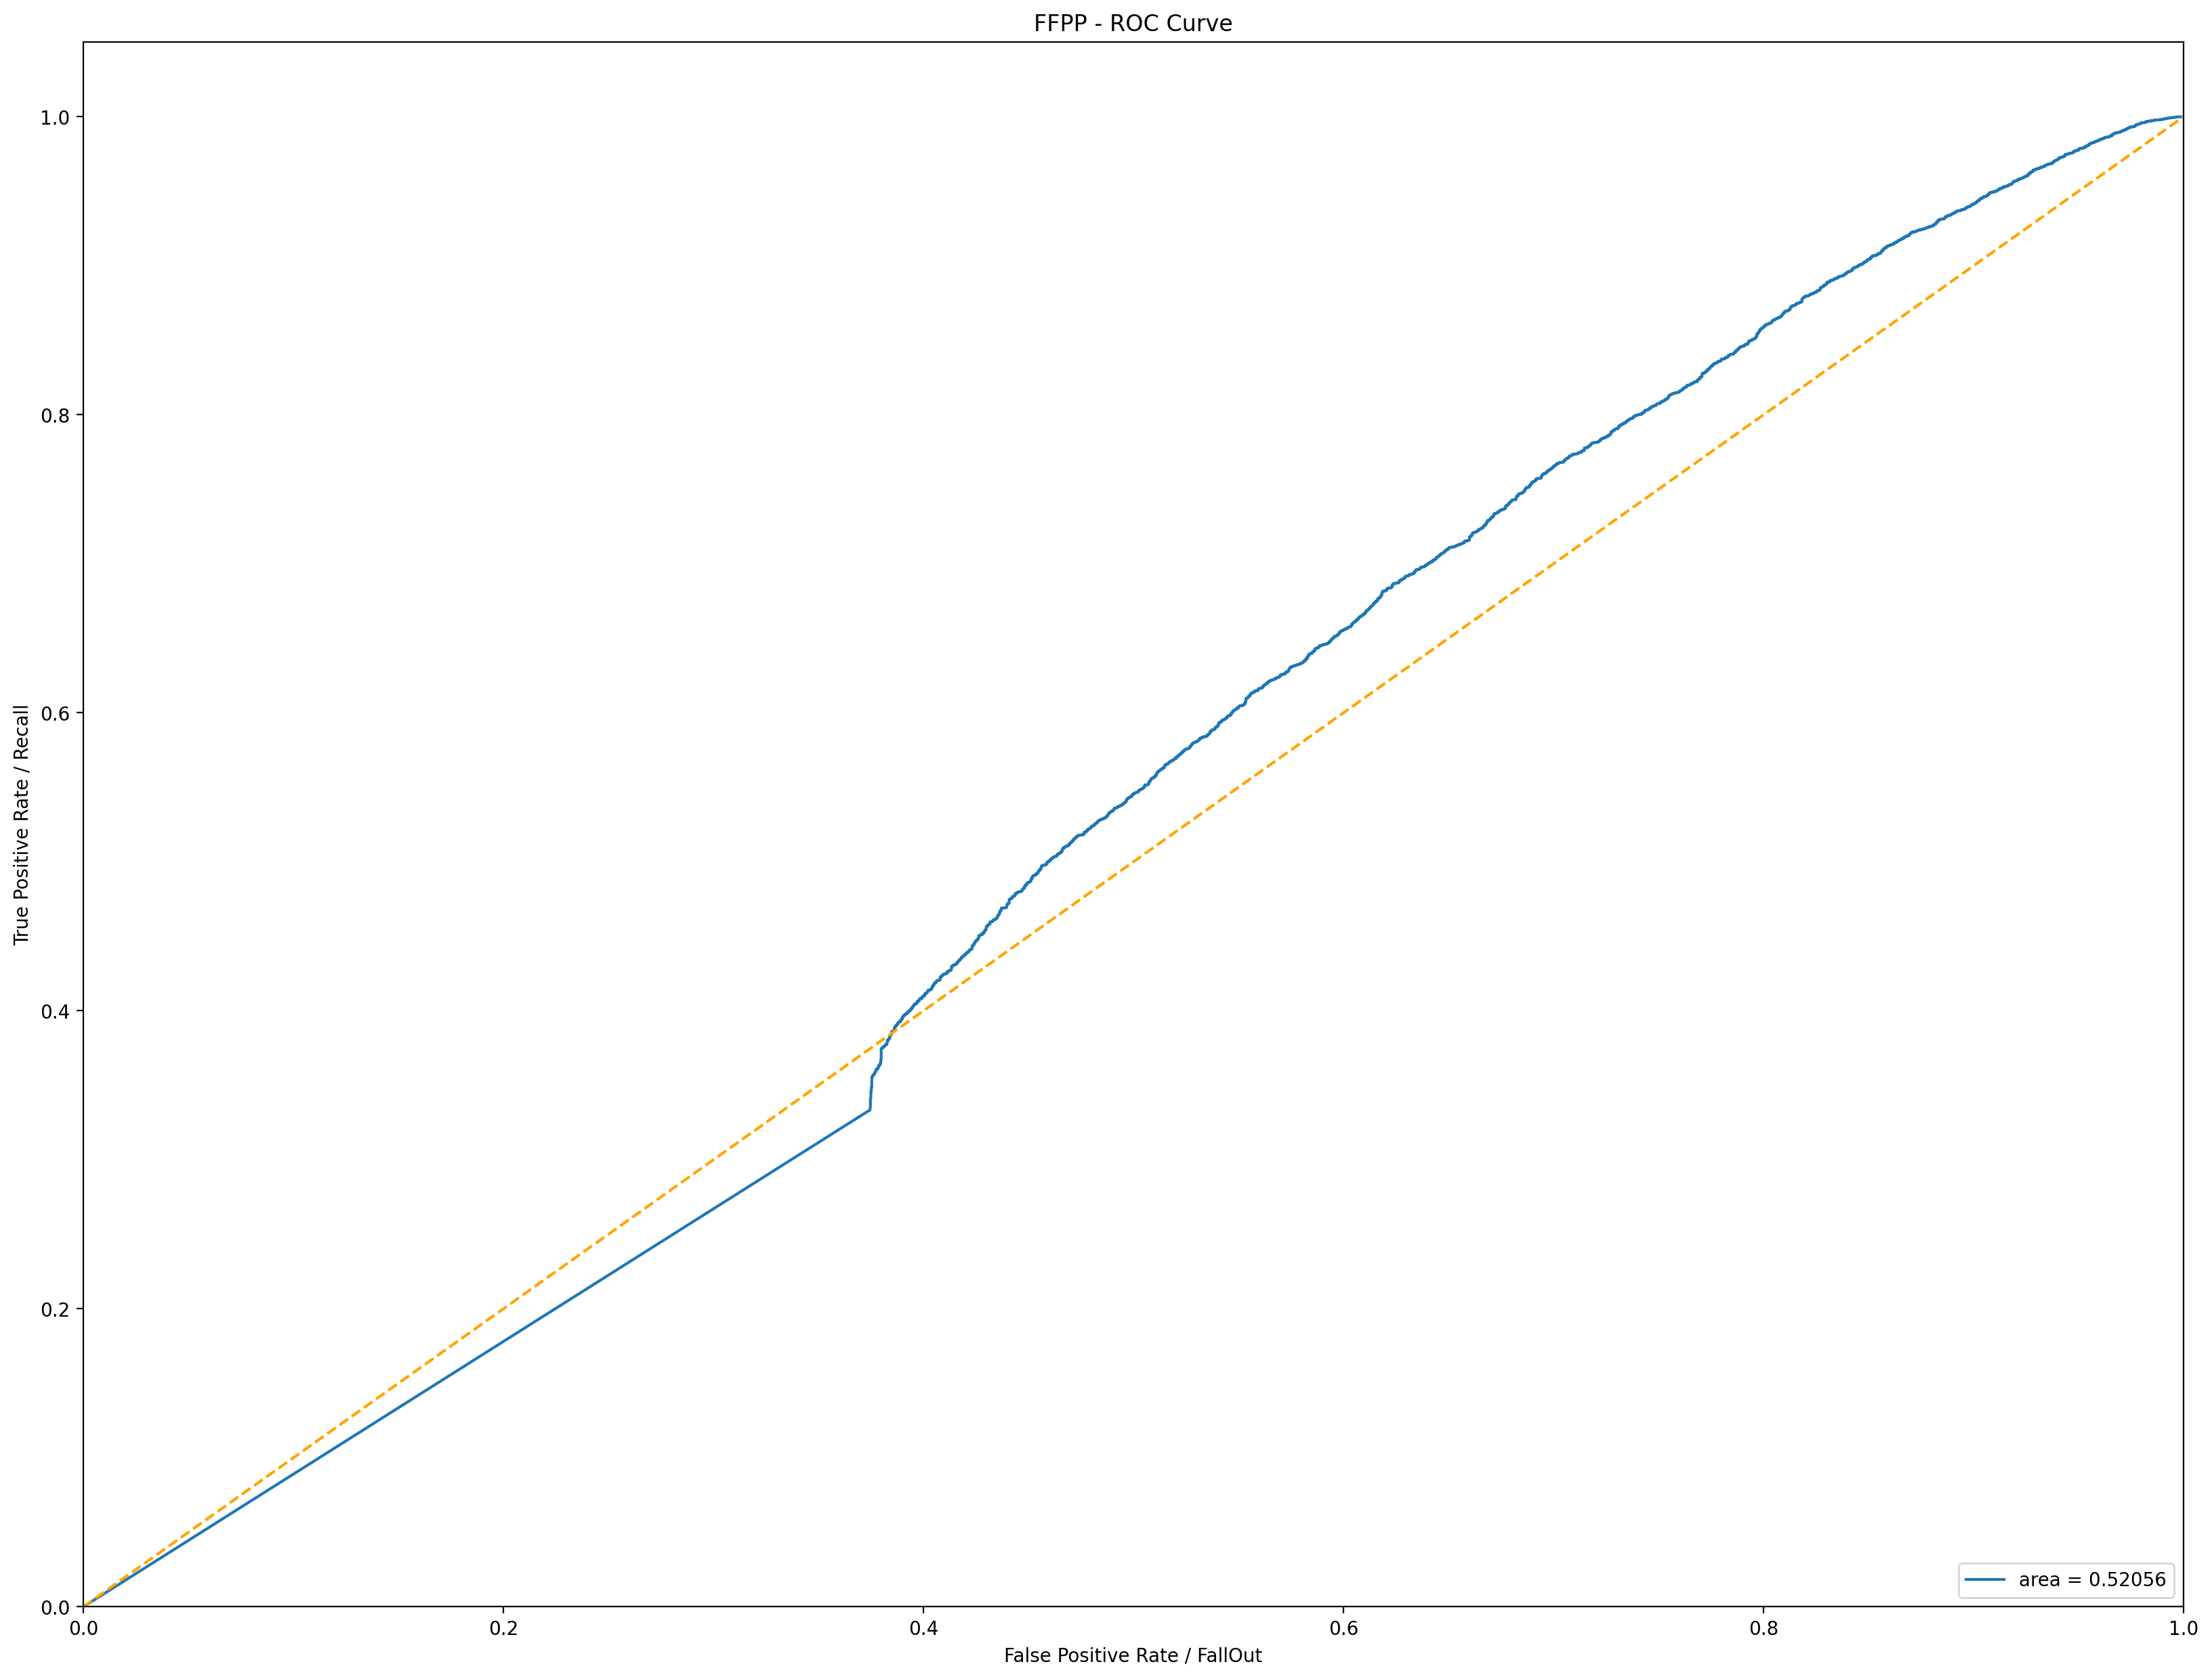

In [30]:
mpl.rcParams.update(mpl.rcParamsDefault)

fpr, tpr, _ = roc_curve(all_truth, all_preds)
roc_auc = auc(fpr, tpr)
    
plt.figure(figsize=(20, 15))

plt.plot(fpr, tpr, label='area = %0.5f' % roc_auc)

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate / FallOut')
plt.ylabel('True Positive Rate / Recall')
plt.title(ds.upper()+' - ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
import torch
import torch.nn.functional as F
import cv2, os, dlib
import numpy as np
from py_utils.face_utils import lib
from py_utils.vid_utils import proc_vid as pv
from py_utils.DL.pytorch_utils.models.classifier import SPPNet
import glob
from tqdm import tqdm
import pandas as pd

sample_num = 10
# Employ dlib to extract face area and landmark points
pwd = os.path.dirname(os.path.abspath('dspfwa'))
front_face_detector = dlib.get_frontal_face_detector()
lmark_predictor = dlib.shape_predictor(pwd + '/dlib_model/shape_predictor_68_face_landmarks.dat')

ds = 'dfdc'
ds_ = 'dfdc-35-5-10'

def im_test(net, im):
    face_info = lib.align(im[:, :, (2,1,0)], front_face_detector, lmark_predictor)
    # Samples
    if len(face_info) != 1:
        prob = -1
    else:
        _, point = face_info[0]
        rois = []
        for i in range(sample_num):
            roi, _ = lib.cut_head([im], point, i)
            rois.append(cv2.resize(roi[0], (224, 224)))

        # vis_ = np.concatenate(rois, 1)
        # cv2.imwrite('vis.jpg', vis_)

        bgr_mean = np.array([103.939, 116.779, 123.68])
        bgr_mean = bgr_mean[np.newaxis, :, np.newaxis, np.newaxis]
        bgr_mean = torch.from_numpy(bgr_mean).float()#.cuda()

        rois = torch.from_numpy(np.array(rois)).float()#.cuda()
        rois = rois.permute((0, 3, 1, 2))
        prob = net(rois - bgr_mean)
        prob = F.softmax(prob, dim=1)
        prob = prob.data.cpu().numpy()
        prob = 1 - np.mean(np.sort(prob[:, 0])[np.round(sample_num / 2).astype(int):])
    return prob, face_info

def draw_face_score(im, face_info, prob):
    if len(face_info) == 0:
        return im

    _, points = np.array(face_info[0], dtype=object)
    x1 = np.min(points[:, 0])
    x2 = np.max(points[:, 0])
    y1 = np.min(points[:, 1])
    y2 = np.max(points[:, 1])

    # Real: (0, 255, 0), Fake: (0, 0, 255)
    color = (0, prob * 255, (1 - prob) * 255)
    cv2.rectangle(im, (x1, y1), (x2, y2), color, 10)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(im, '{:.3f}'.format(prob), (x1, y1 - 10), font, 1, color, 3, cv2.LINE_AA)
    return im

num_class = 2
net = SPPNet(backbone=50, num_class=2)
net = net#.cuda()
net.eval()
model_path = os.path.join('ckpt/', 'SPP-res50.pth')
if os.path.isfile(model_path):
    print("=> loading checkpoint '{}'".format(model_path))
    checkpoint = torch.load(model_path, map_location=torch.device('cpu'))
    start_epoch = checkpoint['epoch']
    net.load_state_dict(checkpoint['net'])
    print("=> loaded checkpoint '{}' (epoch {})"
          .format(model_path, start_epoch))
else:
    raise ValueError("=> no checkpoint found at '{}'".format(model_path))

test_folder = torch.load("../icpr2020dfdc/weights/binclass/net-EfficientNetB4_traindb-"+ds_+"_face-scale_size-224_seed-41_1/bestval.pth", map_location=torch.device('cpu'))['test_videos_used'][0]
df = pd.read_pickle("../icpr2020dfdc/output/"+ds+"/dfs/from_video_0_to_video_0.pkl")
test_df = df[df.video.isin(test_folder)]
all_truth = test_df.label*1.0
all_preds = []
for file in range(1):
    f_path = "../icpr2020dfdc/output/"+ds+"/faces/ayqvfdhslr.mp4/fr250_subj0.jpg"
    suffix = f_path.split('.')[-1]
    if suffix.lower() in ['jpg', 'png', 'jpeg', 'bmp', 'tif', 'nef', 'raf']:
        im = cv2.imread(f_path)
        if im is None:
            prob = -1
        else:
            prob, face_info = im_test(net, im)
        print(prob)
        draw_face_score(cv2.imread(f_path), face_info, prob)

    elif suffix.lower() in ['mp4', 'avi', 'mov']:
        # Parse video
        imgs, frame_num, fps, width, height = pv.parse_vid(f_path)
        probs = []
        for fid, im in enumerate(imgs):
            print('Frame: ' + str(fid))
            prob, face_info = im_test(net, im)
            probs.append(prob)

        print(probs)
    

=> loading checkpoint 'ckpt/SPP-res50.pth'
=> loaded checkpoint 'ckpt/SPP-res50.pth' (epoch 49)
0.7444154322147369


In [10]:
face_info

[[array([[ 6.06340726e-03,  1.95975142e-04, -1.16600562e+00],
         [-1.95975142e-04,  6.06340726e-03, -1.09088704e+00]]),
  array([[161, 233],
         [162, 260],
         [165, 286],
         [170, 312],
         [181, 337],
         [197, 358],
         [217, 376],
         [238, 388],
         [262, 392],
         [285, 389],
         [307, 376],
         [326, 359],
         [342, 338],
         [352, 315],
         [358, 290],
         [361, 265],
         [363, 241],
         [186, 205],
         [200, 195],
         [219, 192],
         [237, 194],
         [253, 201],
         [281, 204],
         [297, 198],
         [315, 197],
         [332, 201],
         [344, 212],
         [266, 221],
         [266, 236],
         [265, 250],
         [265, 264],
         [242, 280],
         [253, 283],
         [264, 285],
         [275, 284],
         [286, 282],
         [204, 224],
         [216, 218],
         [229, 218],
         [240, 226],
         [228, 228],
         [215

In [142]:
if len(face_info) == 0:
    _=_

_, points = np.array(face_info[0], dtype=object)
x1 = np.min(points[:, 0])
x2 = np.max(points[:, 0])
y1 = np.min(points[:, 1])
y2 = np.max(points[:, 1])

# Real: (0, 255, 0), Fake: (0, 0, 255)
color = (0, prob * 255, (1 - prob) * 255)
cv2.rectangle(im, (x1, y1), (x2, y2), color, 10)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, '{:.3f}'.format(prob), (x1, y1 - 10), font, 1, color, 3, cv2.LINE_AA)

array([[[ 8, 10, 18],
        [ 8, 10, 18],
        [ 8, 11, 16],
        ...,
        [ 9,  9, 15],
        [ 9,  9, 15],
        [ 9,  9, 15]],

       [[ 8, 10, 18],
        [ 8, 10, 18],
        [ 8, 11, 16],
        ...,
        [ 9,  9, 15],
        [ 9,  9, 15],
        [ 9,  9, 15]],

       [[ 8, 10, 18],
        [ 8, 10, 18],
        [ 8, 11, 16],
        ...,
        [ 9,  9, 15],
        [ 9,  9, 15],
        [ 9,  9, 15]],

       ...,

       [[33, 60, 87],
        [33, 60, 87],
        [33, 60, 86],
        ...,
        [31, 65, 89],
        [32, 66, 90],
        [33, 67, 91]],

       [[33, 60, 87],
        [33, 60, 87],
        [34, 61, 87],
        ...,
        [31, 65, 89],
        [32, 66, 90],
        [33, 67, 91]],

       [[33, 60, 87],
        [34, 61, 88],
        [34, 61, 87],
        ...,
        [31, 65, 89],
        [31, 65, 89],
        [33, 67, 91]]], dtype=uint8)